# This notebook evaluates the predictions of the TURL output

In [2]:
import pandas as pd
from sklearn.metrics import f1_score
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [22]:
#paths
product_path = '../../../../src/data/product'
mapping_corpus_path_2 = os.path.join(product_path, 'lspc2020_to_tablecorpus/Cleaned')
train_test_all_filtered_path = os.path.join(product_path, 'train_test_split/output_unfiltered_tables/large/after_manual_checking')
visualization_path = '../../../../visualizations'

In [4]:
#load Turl results
with open('../TURL/TURL_results/evaluation_results_3.json') as f:
    res_dict = json.load(f)
res = pd.DataFrame(list(res_dict.items()),columns = ['cluster_id','f1_score']) 
res

,cluster_id,f1_score
0,19508,0.967480
1,1114399,0.939227
2,837152,0.993377
3,3902882,0.980392
4,366294,0.985915
...,...,...
1405,1345336,0.000000
1406,2698103,0.666667
1407,1194400,0.285714
1408,312410,1.000000


In [5]:
res.describe()

,f1_score
count,1410.000000
mean,0.645340
std,0.326738
min,0.000000
25%,0.401190
50%,0.727273
75%,0.962680
max,1.000000


In [6]:
#load the whole concatenated test set
df_test= pd.read_json(os.path.join(train_test_all_filtered_path,'test/concatenated_data/test_all_filtered_tables.json.gz'), compression='gzip', lines=True)
df_test = df_test[['name','description','cluster_id']]
df_test['cluster_id'] = df_test['cluster_id'].apply(str)
df_test

,name,description,cluster_id
0,WD 2TB Elements Portable External Hard Drive -...,Brand: Western Digital Color: black Features: ...,541658
1,GoPro Head Strap + Quick Clip,nan,863679
2,GoPro 3 way grip Arm GoPro,nan,251884
3,Akérat Smoothing Exfoliating Cream,<p>Targeted body cream smoothes and retexturiz...,1107309
4,Moisturizing Self-Tanning Silky Gel,"<p>Non-greasy, hydrating self-tanner gives the...",230191
...,...,...,...
10650,Apple Lightning to USB-C Cable (2m),Apple Lightning to USB-C Cable (2m),51314
10651,Apple Lightning to VGA adapter,Apple Lightning to VGA adapter,185147
10652,Apple Lightning to Digital AV adapter,Apple Lightning to Digital AV adapter,32374
10653,Rolex Watches Oyster Perpetual GMT-Master II 1...,Brand : Replica Rolex Collection : Oyster Perp...,800686


In [7]:
#load the whole concatenated train set
df_train = pd.read_json(os.path.join(train_test_all_filtered_path,'train/concatenated_data/train_all_filtered_tables.json.gz'), compression='gzip', lines=True)
df_train = df_train[['name','description','cluster_id']]
df_train['cluster_id'] = df_train['cluster_id'].apply(str)
df_train

,name,description,cluster_id
0,rum body lotion.,a lightweight rum-scented body lotion that abs...,1257145
1,Cisco Catalyst WS-C2960X-24TD-L Stackable Rack...,nan,758825
2,Laurel Heights Charcoal Crest LH99,Marchand's Interior & Hardware in Gonzales has...,18329550
3,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,52605388
4,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,41513137
...,...,...,...
11116,Anthelios Xl Spf50 Gel-crema Toque Seco Color ...,Anthelios xl spf50 gelcrema toque seco color 5...,1937007
11117,Vichy neovadiol crema piel seca 50ml,Vichy neovadiol crema piel seca 50 ml NEOVADIO...,33370
11118,Anthelios Xl Leche Spf50+ 250ml,ANTHELIOS XL SPF 50 LECHE ATERCIOPELADA 250ml ...,708960
11119,Autohelios gel autobronceador 100ml,AUTOHELIOS GELLECHE Autobronceador hidratante ...,62047


# F1 Scores for different domains

In [8]:
domains=['Bikes','Cars','Clothes','Drugstore','Electronics','Random','Technology','Tools']

In [9]:
#get all clusters with information
combined_csv_data = pd.concat([pd.read_csv(os.path.join(mapping_corpus_path_2, f"{file}_cluster_8_tables.csv")) for file in domains]).drop(columns=['Unnamed: 0'])

In [10]:
#get cluster_ids
cluster_list=[]
files_representation_train = [file for file in os.listdir(os.path.join(train_test_all_filtered_path,'train_cleaned')) if file.endswith('.json.gz')]
for zip_file in files_representation_train:
    df = pd.read_json(os.path.join(train_test_all_filtered_path,'train_cleaned') + '/{}'.format(zip_file), compression='gzip', lines=True)
    cluster_list.extend(df['cluster_id'].tolist())
    # get only clusters that are unique
unique_clusters = np.unique(cluster_list)
unique_clusters = np.delete(unique_clusters, 0)

In [11]:
combined_csv_data_filter = combined_csv_data[combined_csv_data['cluster_id'].isin(unique_clusters)].drop_duplicates(subset=['cluster_id'])
combined_csv_data_filter['cluster_id'] = combined_csv_data_filter['cluster_id'].apply(str)
combined_csv_data_filter

,cluster_id,domain
12,1001195,Bikes
19,1345336,Bikes
23,1615000,Bikes
27,1992384,Bikes
32,2475384,Bikes
...,...,...
303,76643198,Technology
304,76869259,Technology
305,76869317,Technology
306,78260404,Technology


In [12]:
#scale cluster_ids
#combined_csv_data_filter['label'] = combined_csv_data_filter.groupby('cluster_id').ngroup()
#combine information with f1 scores
df_domain_f1 = pd.merge(res, combined_csv_data_filter, how="left", on=["cluster_id"])
df_domain_f1['cluster_id'] = df_domain_f1['cluster_id'].apply(str)
df_domain_f1

,cluster_id,f1_score,domain
0,19508,0.967480,Random
1,1114399,0.939227,Random
2,837152,0.993377,Random
3,3902882,0.980392,Random
4,366294,0.985915,Random
...,...,...,...
1405,1345336,0.000000,Bikes
1406,2698103,0.666667,Random
1407,1194400,0.285714,Random
1408,312410,1.000000,Random


In [13]:
df_domain_f1_overview = df_domain_f1.groupby('domain').mean().reset_index().sort_values(by='f1_score', ascending=False)
df_domain_f1_overview

,domain,f1_score
0,Bikes,0.857143
1,Cars,0.787633
6,Technology,0.693154
4,Electronics,0.670157
5,Random,0.615410
3,Drugstore,0.605227
2,Clothes,0.600972


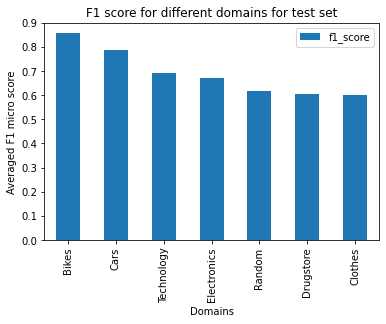

In [23]:
df_domain_f1_overview.plot(x="domain", y="f1_score", kind="bar")
    
plt.ylabel('Averaged F1 micro score')
plt.xlabel('Domains')
plt.title('F1 score for different domains for test set')
plt.savefig(os.path.join(visualization_path, 'TURL_F1_domains_test'))
plt.show()

# F1 scores for size of train data

In [24]:
df_train_counts = df_train.groupby('cluster_id').count().reset_index()

#join train set and f1 scores for clusters
df_amount_train_f1 = pd.merge(res, df_train_counts, how="left", on="cluster_id")
df_amount_train_f1

,cluster_id,f1_score,name,description
0,19508,0.967480,116,116
1,1114399,0.939227,89,89
2,837152,0.993377,81,81
3,3902882,0.980392,80,80
4,366294,0.985915,81,81
...,...,...,...,...
1405,1345336,0.000000,5,5
1406,2698103,0.666667,3,3
1407,1194400,0.285714,11,11
1408,312410,1.000000,6,6


In [25]:
bins = [0, 5, 10, 15, 25, 50, 100, 150]
#create bins for categorization
df_amount_train_f1['binned'] = pd.cut(df_amount_train_f1['name'], bins)
df_amount_train_f1

,cluster_id,f1_score,name,description,binned
0,19508,0.967480,116,116,"(100, 150]"
1,1114399,0.939227,89,89,"(50, 100]"
2,837152,0.993377,81,81,"(50, 100]"
3,3902882,0.980392,80,80,"(50, 100]"
4,366294,0.985915,81,81,"(50, 100]"
...,...,...,...,...,...
1405,1345336,0.000000,5,5,"(0, 5]"
1406,2698103,0.666667,3,3,"(0, 5]"
1407,1194400,0.285714,11,11,"(10, 15]"
1408,312410,1.000000,6,6,"(5, 10]"


In [26]:
df_amount_train_f1_overview = df_amount_train_f1.groupby('binned').mean().drop(columns=['name', 'description']).reset_index()
df_amount_train_f1_overview['binned'] = df_amount_train_f1_overview['binned'].apply(str)
df_amount_train_f1_overview

,binned,f1_score
0,"(0, 5]",0.594511
1,"(5, 10]",0.689868
2,"(10, 15]",0.793572
3,"(15, 25]",0.716896
4,"(25, 50]",0.825194
5,"(50, 100]",0.970447
6,"(100, 150]",0.967480


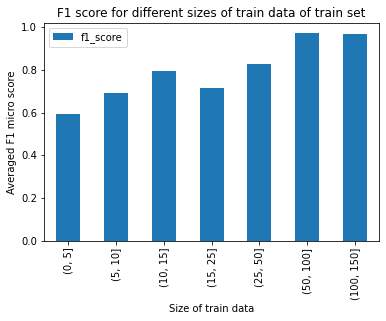

In [27]:
df_amount_train_f1_overview.plot(x="binned", y="f1_score", kind="bar")

plt.ylabel('Averaged F1 micro score')
plt.xlabel('Size of train data')
plt.title('F1 score for different sizes of train data of train set')
plt.savefig(os.path.join(visualization_path, 'TURL_F1_train_size'))
plt.show()

# F1 scores for description column 

In [28]:
#replace missing values
df_test = df_test.replace(r'^\s*$', np.NaN, regex=True).replace("nan", 0)
df_test['name'] = df_test['name'].fillna(0)
df_test['description'] = df_test['description'].fillna(0)
df_test['cluster_id'] = df_test['cluster_id'].apply(str)
df_test

,name,description,cluster_id
0,WD 2TB Elements Portable External Hard Drive -...,Brand: Western Digital Color: black Features: ...,541658
1,GoPro Head Strap + Quick Clip,0,863679
2,GoPro 3 way grip Arm GoPro,0,251884
3,Akérat Smoothing Exfoliating Cream,<p>Targeted body cream smoothes and retexturiz...,1107309
4,Moisturizing Self-Tanning Silky Gel,"<p>Non-greasy, hydrating self-tanner gives the...",230191
...,...,...,...
10650,Apple Lightning to USB-C Cable (2m),Apple Lightning to USB-C Cable (2m),51314
10651,Apple Lightning to VGA adapter,Apple Lightning to VGA adapter,185147
10652,Apple Lightning to Digital AV adapter,Apple Lightning to Digital AV adapter,32374
10653,Rolex Watches Oyster Perpetual GMT-Master II 1...,Brand : Replica Rolex Collection : Oyster Perp...,800686


### We only look at the description, as the name is only once not given with the description column empty as well. So, it is irrelevant. Around 2800 entities do not have a description.

In [29]:
df_empty_desc_f1 = pd.merge(res, df_test.drop(columns=['name']), how="left", on="cluster_id")
#f1 with description
df_empty_desc_f1['desc_empty'] = 'no'
df_empty_desc_f1.loc[df_empty_desc_f1['description']==0, 'desc_empty'] = 'yes'
df_empty_desc_f1

,cluster_id,f1_score,description,desc_empty
0,19508,0.967480,Stay ahead of the pack with Garmin's Extended ...,no
1,19508,0.967480,Stay ahead of the pack with Garmin's Extended ...,no
2,19508,0.967480,Stay ahead of the pack with Garmin's Extended ...,no
3,19508,0.967480,Mount your Garmin Edge computer with the Quart...,no
4,19508,0.967480,Stay ahead of the pack with Garmin's Extended ...,no
...,...,...,...,...
10650,1345336,0.000000,Te wytrzymałe multisportowe zegarki sportowe G...,no
10651,2698103,0.666667,���������� Epson 220ml Yellow for Stylus Pro 4...,no
10652,1194400,0.285714,None,no
10653,312410,1.000000,Kingston HyperX 16GB PREDATOR Black Heatsink (...,no


In [30]:
df_empty_desc_f1.groupby('desc_empty').mean().sort_values(by='f1_score', ascending=False)

,f1_score
desc_empty,
no,0.753422
yes,0.701856


# Compare different settings to description

In [31]:
df_domain_description = pd.merge(df_domain_f1, df_empty_desc_f1, how="left", on=['cluster_id', 'f1_score'])
df_domain_description

,cluster_id,f1_score,domain,description,desc_empty
0,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,no
1,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,no
2,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,no
3,19508,0.967480,Random,Mount your Garmin Edge computer with the Quart...,no
4,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,no
...,...,...,...,...,...
10650,1345336,0.000000,Bikes,Te wytrzymałe multisportowe zegarki sportowe G...,no
10651,2698103,0.666667,Random,���������� Epson 220ml Yellow for Stylus Pro 4...,no
10652,1194400,0.285714,Random,None,no
10653,312410,1.000000,Random,Kingston HyperX 16GB PREDATOR Black Heatsink (...,no


In [32]:
df_domain_description_count = pd.merge(df_domain_description, df_amount_train_f1.drop(columns=['name', 'description']), how="left", on=['cluster_id', 'f1_score']).drop(columns=['desc_empty'])
df_domain_description_count

,cluster_id,f1_score,domain,description,binned
0,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,"(100, 150]"
1,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,"(100, 150]"
2,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,"(100, 150]"
3,19508,0.967480,Random,Mount your Garmin Edge computer with the Quart...,"(100, 150]"
4,19508,0.967480,Random,Stay ahead of the pack with Garmin's Extended ...,"(100, 150]"
...,...,...,...,...,...
10650,1345336,0.000000,Bikes,Te wytrzymałe multisportowe zegarki sportowe G...,"(0, 5]"
10651,2698103,0.666667,Random,���������� Epson 220ml Yellow for Stylus Pro 4...,"(0, 5]"
10652,1194400,0.285714,Random,None,"(10, 15]"
10653,312410,1.000000,Random,Kingston HyperX 16GB PREDATOR Black Heatsink (...,"(5, 10]"


In [33]:
df_domain_description_count_without = df_domain_description_count[df_domain_description_count['description']==0]
df_domain_description_count_with = df_domain_description_count[df_domain_description_count['description']!=0]

<AxesSubplot:>

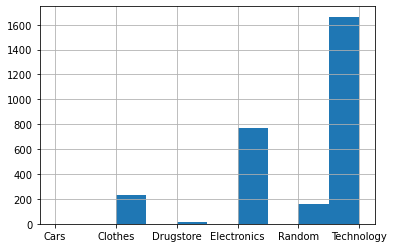

In [34]:
df_domain_description_count_without['domain'].sort_values().hist()

<AxesSubplot:>

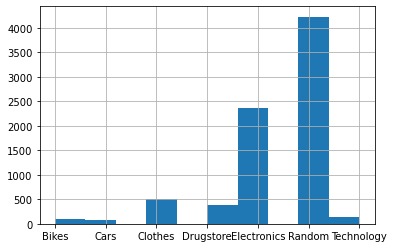

In [35]:
df_domain_description_count_with['domain'].sort_values().hist()

<AxesSubplot:>

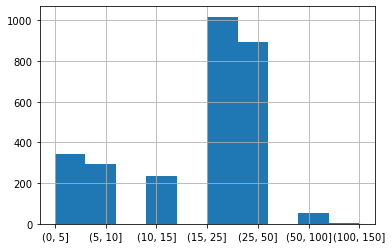

In [36]:
df_domain_description_count_without['binned'].sort_values().astype(str).hist()

<AxesSubplot:>

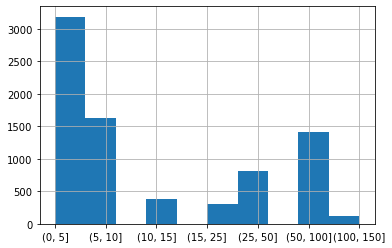

In [37]:
df_domain_description_count_with['binned'].sort_values().astype(str).hist()

# F1 score for amount of tokens in test data

In [38]:
df_test_amt_tokens_f1 = pd.merge(res, df_test, how="left", on=['cluster_id'])
df_test_amt_tokens_f1['amount_tokens'] = df_test_amt_tokens_f1['name'].str.len()
df_test_amt_tokens_f1['amount_tokens'] = df_test_amt_tokens_f1['amount_tokens'].fillna(0).apply(int)
df_test_amt_tokens_f1

,cluster_id,f1_score,name,description,amount_tokens
0,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29
1,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29
2,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29
3,19508,0.967480,Quarter Turn Bike Mount,Mount your Garmin Edge computer with the Quart...,23
4,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29
...,...,...,...,...,...
10650,1345336,0.000000,GARMIN FENIX 6 SAPPHIRE,Te wytrzymałe multisportowe zegarki sportowe G...,23
10651,2698103,0.666667,���������� Epson 220ml Yellow for Stylus Pro 4...,���������� Epson 220ml Yellow for Stylus Pro 4...,69
10652,1194400,0.285714,ALTAVOZ BLUETOOTH JBL CHARGE 4 BLUE - 30W - IP...,None,118
10653,312410,1.000000,Kingston HyperX 16GB PREDATOR Black Heatsink (...,Kingston HyperX 16GB PREDATOR Black Heatsink (...,86


In [39]:
df_test_amt_tokens_f1.describe()

,f1_score,amount_tokens
count,10655.000000,10655.000000
mean,0.739702,46.258564
std,0.306994,33.974657
min,0.000000,0.000000
25%,0.516129,24.000000
50%,0.888889,41.000000
75%,0.992701,61.000000
max,1.000000,2047.000000


In [40]:
bins2 = [0, 5, 10, 15, 25, 50, 100, 500, 2500]
#create bins for categorization
df_test_amt_tokens_f1['binned'] = pd.cut(df_test_amt_tokens_f1['amount_tokens'], bins2)
df_test_amt_tokens_f1

,cluster_id,f1_score,name,description,amount_tokens,binned
0,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29,"(25, 50]"
1,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29,"(25, 50]"
2,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29,"(25, 50]"
3,19508,0.967480,Quarter Turn Bike Mount,Mount your Garmin Edge computer with the Quart...,23,"(15, 25]"
4,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,29,"(25, 50]"
...,...,...,...,...,...,...
10650,1345336,0.000000,GARMIN FENIX 6 SAPPHIRE,Te wytrzymałe multisportowe zegarki sportowe G...,23,"(15, 25]"
10651,2698103,0.666667,���������� Epson 220ml Yellow for Stylus Pro 4...,���������� Epson 220ml Yellow for Stylus Pro 4...,69,"(50, 100]"
10652,1194400,0.285714,ALTAVOZ BLUETOOTH JBL CHARGE 4 BLUE - 30W - IP...,None,118,"(100, 500]"
10653,312410,1.000000,Kingston HyperX 16GB PREDATOR Black Heatsink (...,Kingston HyperX 16GB PREDATOR Black Heatsink (...,86,"(50, 100]"


In [41]:
df_test_amt_tokens_f1_overview = df_test_amt_tokens_f1.drop(columns='amount_tokens').groupby('binned').mean()
df_test_amt_tokens_f1_overview

,f1_score
binned,
"(0, 5]",0.666667
"(5, 10]",0.932883
"(10, 15]",0.923988
"(15, 25]",0.879970
"(25, 50]",0.718084
"(50, 100]",0.660465
"(100, 500]",0.550717
"(500, 2500]",0.142857


In [42]:
df_test_amt_tokens_f1_overview = df_test_amt_tokens_f1_overview.reset_index()
df_test_amt_tokens_f1_overview['binned'] = df_test_amt_tokens_f1_overview['binned'].apply(str)
df_test_amt_tokens_f1_overview

,binned,f1_score
0,"(0, 5]",0.666667
1,"(5, 10]",0.932883
2,"(10, 15]",0.923988
3,"(15, 25]",0.879970
4,"(25, 50]",0.718084
5,"(50, 100]",0.660465
6,"(100, 500]",0.550717
7,"(500, 2500]",0.142857


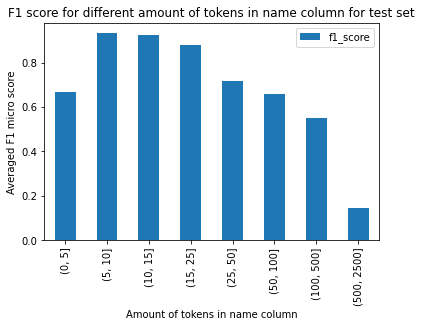

In [43]:
df_test_amt_tokens_f1_overview.plot(x="binned", y="f1_score", kind="bar")
    
plt.ylabel('Averaged F1 micro score')
plt.xlabel('Amount of tokens in name column')
plt.title('F1 score for different amount of tokens in name column for test set')
plt.savefig(os.path.join(visualization_path, 'TURL_F1_amt_tokens_test'))
plt.show()

# Analysis for very good results

In [44]:
df_test_together = pd.merge(res, df_test, how="left", on=['cluster_id'])
df_test_good = df_test_together[df_test_together['f1_score']>0.8]
df_test_good
# --> model number often inside

,cluster_id,f1_score,name,description
0,19508,0.96748,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...
1,19508,0.96748,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...
2,19508,0.96748,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...
3,19508,0.96748,Quarter Turn Bike Mount,Mount your Garmin Edge computer with the Quart...
4,19508,0.96748,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...
...,...,...,...,...
10646,1853720,1.00000,Haste Telescopica Para Hsa-25,Haste Telescopica Para Hsa-25
10647,3561552,1.00000,Sigma 17-50mm F2.8 EX DC OS HSM Lens [Canon],Characterized by its versatile zoom range and ...
10649,150194,1.00000,Logitech M235 - Rouge,Souris optique sans fil
10653,312410,1.00000,Kingston HyperX 16GB PREDATOR Black Heatsink (...,Kingston HyperX 16GB PREDATOR Black Heatsink (...


In [45]:
df_test_good_cluster_list = list(df_test_good['cluster_id'].drop_duplicates())
len(df_test_good_cluster_list)

546

# Analysis for very bad results

In [46]:
df_test_bad = df_test_together[df_test_together['f1_score']<0.2]
df_test_bad

,cluster_id,f1_score,name,description
2802,19237530,0.125,5.9 cu. ft. Freestanding Electric Range with F...,0
2803,19237530,0.125,5.9 cu. ft. Freestanding Electric Range with F...,0
2804,19237530,0.125,5.9 cu. ft. Freestanding Electric Range with F...,0
2805,19237530,0.125,5.9 cu. ft. Freestanding Electric Range with F...,0
2806,19237530,0.125,5.9 cu. ft. Freestanding Electric Range with F...,0
...,...,...,...,...
10635,490523,0.000,EPSON T0963 - Cartouche Encre Magenta Vif -,"<!--#WYSIWYG#--><span style=\""color: rgb(29, 2..."
10640,767463,0.000,Canon CNM6448B001-6448B001 CLI-251XL ChromaLif...,CNM6448B001-6448B001 CLI-251XL ChromaLife100 H...
10641,767463,0.000,Canon CLI-251XL Original Ink Cartridge - Black,Features The CLI-251 inks dry instantly so you...
10645,269684,0.000,"Kingston 8GB, DDR4, 2666MHz (PC4-21300), CL19,...",This document describes ValueRAM's KVR26N19S8/...


In [47]:
df_test_bad_cluster_list = list(df_test_bad['cluster_id'].drop_duplicates())
len(df_test_bad_cluster_list)

181

In [48]:
# write test & train data together with their f1_score into an excel file for manual evaluation of specific clusters
df_train_together = pd.merge(res, df_train, how="left", on=['cluster_id'])
df_train_together['source'] = 'train'
df_test_together['source'] = 'test'

In [49]:
df_all_together = pd.concat([df_train_together, df_test_together], axis=0)
df_all_together.to_excel('df_all_together_with_f1_TURL.xlsx')
df_all_together

,cluster_id,f1_score,name,description,source
0,19508,0.967480,Soporte frontal alargado para bicicleta para s...,Este soporte con brazo alargado permite que te...,train
1,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,train
2,19508,0.967480,Extended Out-front Bike Mount,Stay ahead of the pack with Garmin's Extended ...,train
3,19508,0.967480,Quarter Turn Bike Mount,Mount your Garmin Edge computer with the Quart...,train
4,19508,0.967480,Quarter Turn Bike Mount,Mount your Garmin Edge computer with the Quart...,train
...,...,...,...,...,...
10650,1345336,0.000000,GARMIN FENIX 6 SAPPHIRE,Te wytrzymałe multisportowe zegarki sportowe G...,test
10651,2698103,0.666667,���������� Epson 220ml Yellow for Stylus Pro 4...,���������� Epson 220ml Yellow for Stylus Pro 4...,test
10652,1194400,0.285714,ALTAVOZ BLUETOOTH JBL CHARGE 4 BLUE - 30W - IP...,None,test
10653,312410,1.000000,Kingston HyperX 16GB PREDATOR Black Heatsink (...,Kingston HyperX 16GB PREDATOR Black Heatsink (...,test


# Compare overlap & differences between TURL and baseline

In [50]:
# load test & train data together with f1 score for baseline results first
df_all_together_baseline = pd.read_excel('overview_test_train_f1_baseline.xlsx').drop(columns=['Unnamed: 0'])
df_all_together_baseline['cluster_id'] = df_all_together_baseline['cluster_id'].apply(str)
df_all_together_baseline

,name,description,cluster_id,label,source,f1
0,rum body lotion.,a lightweight rum-scented body lotion that abs...,1257145,736,train,0.727273
1,Cisco Catalyst WS-C2960X-24TD-L Stackable Rack...,NaN,758825,542,train,0.833333
2,Laurel Heights Charcoal Crest LH99,Marchand's Interior & Hardware in Gonzales has...,18329550,1201,train,1.000000
3,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,52605388,1312,train,0.800000
4,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,41513137,1277,train,0.857143
...,...,...,...,...,...,...
21771,Apple Lightning to USB-C Cable (2m),Apple Lightning to USB-C Cable (2m),51314,70,test,0.800000
21772,Apple Lightning to VGA adapter,Apple Lightning to VGA adapter,185147,184,test,0.666667
21773,Apple Lightning to Digital AV adapter,Apple Lightning to Digital AV adapter,32374,45,test,0.666667
21774,Rolex Watches Oyster Perpetual GMT-Master II 1...,Brand : Replica Rolex Collection : Oyster Perp...,800686,565,test,1.000000


In [51]:
df_good_baseline = df_all_together_baseline[df_all_together_baseline['f1']>0.8]
df_good_cluster_list_baseline = list(df_good_baseline['cluster_id'].drop_duplicates())
len(df_good_cluster_list_baseline)

678

In [52]:
df_bad_baseline = df_all_together_baseline[df_all_together_baseline['f1']<0.2]
df_bad_cluster_list_baseline = list(df_bad_baseline['cluster_id'].drop_duplicates())
len(df_bad_cluster_list_baseline)

110

In [58]:
overlap_good_clusters = list(set(df_test_good_cluster_list).intersection(set(df_good_cluster_list_baseline)))
good_clusters_not_in_TURL = list(set(df_good_cluster_list_baseline) - set(df_test_good_cluster_list))
good_clusters_not_in_baseline = list(set(df_test_good_cluster_list) - set(df_good_cluster_list_baseline))
print("The complete overlap between good clusters (with f1 > 0.8) is: {}".format(len(overlap_good_clusters)))
print("Good clusters from baseline which are not good in TURL: {}".format(len(good_clusters_not_in_TURL)))
print("Good clusters from TURL which are not good in the baseline: {}".format(len(good_clusters_not_in_baseline)))

The complete overlap between good clusters (with f1 > 0.8) is: 421
Good clusters from baseline which are not good in TURL: 257
Good clusters from TURL which are not good in the baseline: 125


In [59]:
overlap_bad_clusters = list(set(df_test_bad_cluster_list).intersection(set(df_bad_cluster_list_baseline)))
bad_clusters_not_in_TURL = list(set(df_bad_cluster_list_baseline) - set(df_test_bad_cluster_list))
bad_clusters_not_in_baseline = list(set(df_test_bad_cluster_list) - set(df_bad_cluster_list_baseline))
print("The complete overlap between bad clusters (with f1 < 0.2) is: {}".format(len(overlap_bad_clusters)))
print("Bad clusters from baseline which are not bad in TURL: {}".format(len(bad_clusters_not_in_TURL)))
print("Bad clusters from TURL which are not bad in the baseline: {}".format(len(bad_clusters_not_in_baseline)))

The complete overlap between bad clusters (with f1 < 0.2) is: 53
Bad clusters from baseline which are not bad in TURL: 57
Bad clusters from TURL which are not bad in the baseline: 128


In [65]:
overlap_info_df = pd.DataFrame()
overlap_info_df['cluster_id'] = df_all_together_baseline['cluster_id'].drop_duplicates()
overlap_info_df['overlap_info'] = 'none'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(overlap_good_clusters), 'overlap_info'] = 'overlap_good_clusters'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(good_clusters_not_in_TURL), 'overlap_info'] = 'good_clusters_not_in_TURL'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(good_clusters_not_in_baseline), 'overlap_info'] = 'good_clusters_not_in_baseline'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(overlap_bad_clusters), 'overlap_info'] = 'overlap_bad_clusters'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(bad_clusters_not_in_TURL), 'overlap_info'] = 'bad_clusters_not_in_TURL'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(bad_clusters_not_in_baseline), 'overlap_info'] = 'bad_clusters_not_in_baseline'
overlap_info_df.to_excel('overlap_info.xlsx')
overlap_info_df

,cluster_id,overlap_info
0,1257145,none
1,758825,good_clusters_not_in_TURL
2,18329550,overlap_good_clusters
3,52605388,none
4,41513137,good_clusters_not_in_TURL
...,...,...
9623,1220634,none
9728,2148094,bad_clusters_not_in_baseline
10052,107546,overlap_bad_clusters
10577,1620691,none


# Compare attribute mistakes for same list as with baseline

In [56]:
attribute_mistakes_df = pd.read_csv('cluster_attribute_mistakes.csv').drop(columns='Unnamed: 0')
attribute_mistakes_df['cluster_id'] = attribute_mistakes_df['cluster_id'].apply(str)
attribute_mistakes_cluster_list = list(attribute_mistakes_df['cluster_id'])
res_attribute_mistakes_df = res[res['cluster_id'].isin(attribute_mistakes_cluster_list)]
attribute_mistakes_f1_df = pd.merge(res_attribute_mistakes_df, attribute_mistakes_df, how="left", on=["cluster_id"])
attribute_mistakes_f1_df

,cluster_id,f1_score,label
0,1114399,0.939227,693
1,1566090,0.992481,825
2,2202568,0.984127,946
3,883746,0.976378,603
4,1564248,0.954545,824
...,...,...,...
510,767463,0.000000,546
511,324185,0.250000,301
512,1345336,0.000000,757
513,2698103,0.666667,1011


In [57]:
attribute_mistakes_f1_df.drop(columns='label').describe()

,f1_score
count,515.000000
mean,0.550935
std,0.324267
min,0.000000
25%,0.333333
50%,0.600000
75%,0.800000
max,1.000000
